In [1]:
#The idea is to perform an experiment on two different type of sbox (the original PRESENT sbox)
#and improved version of it provided in the paper confused by confusion to see if they leave different kind 
#of signatures

In [2]:
using PyPlot
plt = PyPlot

PyPlot

In [3]:
new_sbox = [0x6, 0x4, 0x7, 0x8, 0x0, 0x5, 0x2, 0xA, 0xE, 0x3, 0xD, 0x1, 0xC, 0xF, 0x9, 0xB];
present_sbox = [0xC, 0x5, 0x6, 0xB, 0x9, 0x0, 0xA, 0xD, 0x3, 0xE, 0xF, 0x8, 0x4, 0x7, 0x1, 0x2];

In [4]:
present_result = []
new_result = []

0-element Array{Any,1}

In [5]:
function hw_look_up_maker(binstr)
    hw = 0
    for i in 1:length(binstr)
        if binstr[i] == '1'
            hw = hw+1
        end
    end
    hw
end
#HW function for a byte
HW = Dict()
for i in 0:255
    HW[i] = hw_look_up_maker(bin(i,4))
end

In [8]:
#generating the result vectors
for k1 in 1:15 #k1 = 0 can not occur in pair
    for k2 in 0:k1-1
        res_val_p = 0
        res_val_n = 0
        for pt in 0:15
            v1 = new_sbox[pt$k1+1]
            v2 = new_sbox[pt$k2+1]
            res_val_n += HW[v1$v2]
            
            z1 = present_sbox[pt$k1+1]
            z2 = present_sbox[pt$k2+1]
            res_val_p += HW[z1$z2]
        end
        push!(present_result, res_val_p)
        push!(new_result, res_val_n)
    end
end
length(new_result)    

240

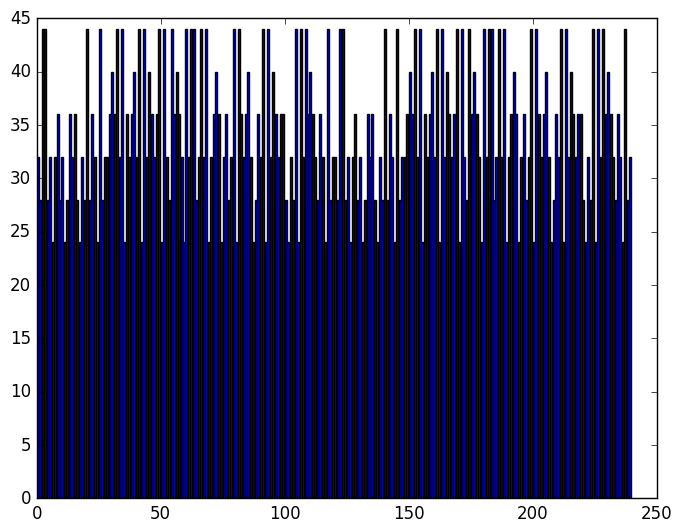

(PyObject <matplotlib.patches.Rectangle object at 0x7f4549f0cb10>,PyObject <matplotlib.patches.Rectangle object at 0x7f4549f171d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f4549f17850>,PyObject <matplotlib.patches.Rectangle object at 0x7f4549f17ed0>,PyObject <matplotlib.patches.Rectangle object at 0x7f4549f26590>,PyObject <matplotlib.patches.Rectangle object at 0x7f4549f26c10>,PyObject <matplotlib.patches.Rectangle object at 0x7f4549eb32d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f4549eb3950>,PyObject <matplotlib.patches.Rectangle object at 0x7f4549eb3fd0>,PyObject <matplotlib.patches.Rectangle object at 0x7f4549ec1690>,PyObject <matplotlib.patches.Rectangle object at 0x7f4549ec1d10>,PyObject <matplotlib.patches.Rectangle object at 0x7f4549ece3d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f4549ecea50>,PyObject <matplotlib.patches.Rectangle object at 0x7f4549ecef50>,PyObject <matplotlib.patches.Rectangle object at 0x7f4549edb790>,PyObject <matplotlib.pat

In [9]:
x = 0:239
y = new_result
figure, ax = subplots()
ax[:bar](x,y)

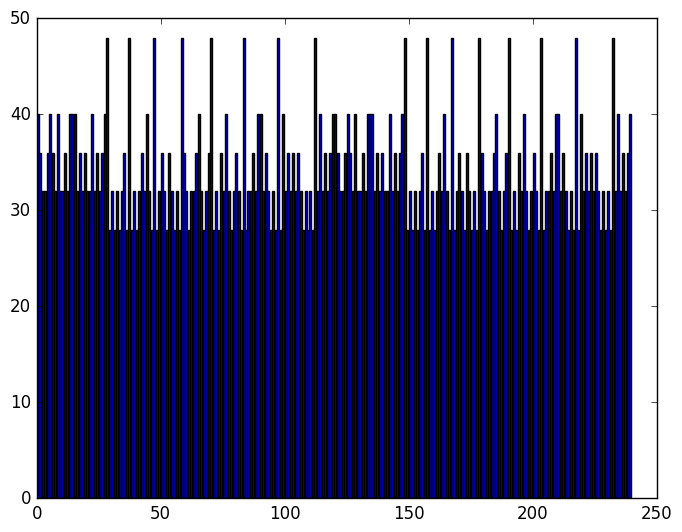

(PyObject <matplotlib.patches.Rectangle object at 0x7f45498d3550>,PyObject <matplotlib.patches.Rectangle object at 0x7f45498d3850>,PyObject <matplotlib.patches.Rectangle object at 0x7f45498d3cd0>,PyObject <matplotlib.patches.Rectangle object at 0x7f45498e2390>,PyObject <matplotlib.patches.Rectangle object at 0x7f45498e2a10>,PyObject <matplotlib.patches.Rectangle object at 0x7f45498e2f10>,PyObject <matplotlib.patches.Rectangle object at 0x7f45498ee750>,PyObject <matplotlib.patches.Rectangle object at 0x7f45498eedd0>,PyObject <matplotlib.patches.Rectangle object at 0x7f454987b490>,PyObject <matplotlib.patches.Rectangle object at 0x7f454987bb10>,PyObject <matplotlib.patches.Rectangle object at 0x7f45498881d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f4549888850>,PyObject <matplotlib.patches.Rectangle object at 0x7f4549888ed0>,PyObject <matplotlib.patches.Rectangle object at 0x7f4549894590>,PyObject <matplotlib.patches.Rectangle object at 0x7f4549894c10>,PyObject <matplotlib.pat

In [10]:
x = 0:239
y = present_result
figure, ax = subplots()
ax[:bar](x,y)

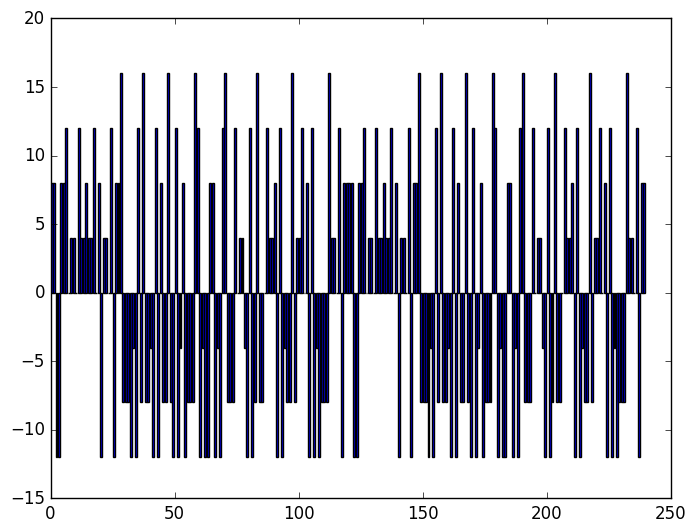

(PyObject <matplotlib.patches.Rectangle object at 0x7f45488a7d50>,PyObject <matplotlib.patches.Rectangle object at 0x7f45488343d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f4548834a50>,PyObject <matplotlib.patches.Rectangle object at 0x7f4548834f50>,PyObject <matplotlib.patches.Rectangle object at 0x7f4548842790>,PyObject <matplotlib.patches.Rectangle object at 0x7f4548842e10>,PyObject <matplotlib.patches.Rectangle object at 0x7f454884e4d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f454884eb50>,PyObject <matplotlib.patches.Rectangle object at 0x7f454885c210>,PyObject <matplotlib.patches.Rectangle object at 0x7f454885c890>,PyObject <matplotlib.patches.Rectangle object at 0x7f454885cf10>,PyObject <matplotlib.patches.Rectangle object at 0x7f45488695d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f4548869c50>,PyObject <matplotlib.patches.Rectangle object at 0x7f45487f6310>,PyObject <matplotlib.patches.Rectangle object at 0x7f45487f6990>,PyObject <matplotlib.pat

In [15]:
figure, ax = subplots()
ax[:bar](0:239,present_result - new_result)

In [21]:
count=0;
for x in (present_result - new_result)
    if x == 0
        count += 1
        end
end
count

16